In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))

from pathlib import Path
import logging

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
from sklearn.metrics import confusion_matrix

from src.data.load_data_set import load_data_set
from src.utils.load_config import load_config

In [2]:
def load_model(model_name: str, model_directory: Path):
    model_file = model_directory/f"{model_name}.json"
    model_weights = model_directory/f"{model_name}.h5"
    
    with open(model_file) as json_file:
        loaded_model = model_from_json(json_file.read())
    
    # load weights into new model
    loaded_model.load_weights(str(model_weights))

    return loaded_model

In [22]:
config = load_config("../../config/1.0-TID-RPS-ISO-m1.yml")
config

{'image_size': 50,
 'model_name': 'TID-RPS-ISO-m1',
 'epochs': 1000,
 'enable_tensorboard': True,
 'enable_earlystopping': False,
 'data_raw_path': 'data/raw',
 'data_interim_path': 'data/interim',
 'data_processed_path': 'data/processed',
 'data_labels': {0: 'TID', 1: 'RPS', 2: 'ISO'},
 'data_files': [{'file': 'A.t.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 0},
  {'file': 'A.r.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 1},
  {'file': 'A.i.m1.dir.tar.gz',
   'data_set_type': 'categorical',
   'label_start': 2}],
 'data_train_split': 0.8,
 'data_validation_split': 0.8,
 'data_batch_size': 32,
 'data_num_classes': 3,
 'model_directory': 'models',
 'log_dir': 'logs/fit'}

In [23]:
model = load_model(config['model_name'], Path("../../models"))

In [30]:
# data_processed_path = Path(config.get('data_processed_path', 'data/processed')) / config['model_name']
data_processed_path = Path(config.get('data_processed_path', 'data/processed')) / 'TID-RPS-ISO-m3'


test_data_set = load_data_set(config, Path("../..")/data_processed_path/'test')

In [31]:
predict = []
correct = []

for image, label in test_data_set.take(100):
    predictions = model.predict(image)

    for i in range(predictions.shape[0]):
        predict.append(np.argmax(predictions[i]))
        correct.append(np.argmax(label[i]))

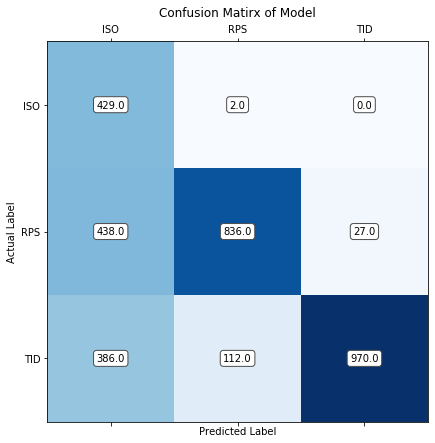

In [32]:
conf_mtrx = confusion_matrix(correct, predict)
labels = sorted(config.get('data_labels', {}).values())

fig, ax = plt.subplots(figsize=(7, 7))

# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(conf_mtrx, cmap="Blues")

for (i, j), z in np.ndenumerate(conf_mtrx):
    ax.text(
        j,i, 
        '{:0.1f}'.format(z),
        ha='center',
        va='center',
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")


plt.title("Confusion Matirx of Model")

plt.show()